# 13장 트리 기반 모형

자료 출처: [ISLP (An Introduction to Statistical Learning with Applications in Python)](https://www.statlearning.com/)

**앙상블**(ensemble)은 원래 "전체적인 조화"를 의미하는 단어인데, 머신러닝 분야에서 앙상블 기법은 단순한 학습 알고리즘을 **결합**하여 단일의 강력한 모델을 얻고자 하는 접근 방식을 말한다. 이번 장에서는 앞 장에서 살펴본 단순한 결정 트리를 다양한 방식으로 결합시키는 앙상블 기법인 배깅(bagging), 랜덤 포레스트(random forest), 부스팅(boosting)에 대해 살펴본다. 

앞 장에서도 언급했듯이 결정 트리 분석은 직관적이어서 이해하고 해석하기 쉽다는 장점이 있는 반면, 전통적 분석 기법에 비해 예측력이 떨어진다는 단점을 지니고 있다. 이 문제를 해결하려는 것이 바로 트리 기반 앙상블 기법이며, 아주 많은 결정 트리를 결합함으로써 예측력을 높이고자 하는 머신러닝 기법이다. 개별 트리 차원에서는 예측력이 미미한 소위 **약한 학습기**(weak learner)이지만, 이들을 결합시킬 경우 예측력이 뚜렷이 개선되는 **강한 학습기**(strong learner)가 될 수 있다.

## 13.1 배깅

앞 장에서 논의된 결정 트리는 높은 분산으로 인해 어려움을 겪는다. 가령 훈련 데이터를 무작위로 두 개로 나누어 각각 트리를 피팅했을 때, 그 결과가 서로 상당히 다를 가능성이 있다. 이에 반해, 전통적인 선형 회귀 같은 경우는 관측수($n$)가 예측변수 개수($p$)에 비해 적당히 크기만 하면 분산이 상대적으로 작은 경향이 있다. 즉, 별개의 데이터세트에 적용했을 때도 유사한 결과를 생성한다는 것이다. 

앙상블 기법 중 가장 먼저 살펴 볼 **배깅**(bagging)은 붓스트랩(bootstrap) 기법을 통해 이 문제를 해결하고자 한다. 사실 배깅은 통계적 학습 방법의 분산을 줄이기 위해 다양한 환경에서 사용할 수 있는 기법이다. 많은 상황에서 아주 유용하게 사용할 수 있지만, 특히 결정 트리에 자주 적용된다. 우선 붓스트랩이 무엇인지 간단히 이해한 다음, 설명을 계속 이어가기로 한다. 

### 붓스트랩

**붓스트랩**은 **재표본추출**(resampling)을 통해 파라미터(또는 통계적 학습 기법) 추정 결과의 정확도(편향, 분산, 신뢰구간, 예측오차 등)를 측정하는 기법을 말한다.  

붓스트랩의 예는 다음과 같다(Wikipedia, "[Bootstrapping (statistics)][key]"). 우리가 전 세계 사람들의 **평균 키**에 관심이 있다고 가정해보자. 우리는 전 세계 인구의 모든 사람의 키를 측정할 수 없기 때문에 그 중 아주 일부만 표본으로 추출하여 평균 키를 측정하게 된다. 표본의 크기가 $N$이라고 하자. 즉, $N$명의 키를 측정한다. 우리는 크기가 $N$인 이 표본에서 평균값 추정치를 단 하나만 얻는다. 그런데 우리의 관심이 평균값뿐만 아니라 그것의 변동성(variability)에도 관심이 있다고 해보자. 즉 표본이 바뀌게 되면, 평균값이 얼마나 바뀔지에 대한 정보를 말한다. 이 변동성을 달리 표현하면, 우리가 표본에서 구한 평균값이 얼마나 정확한지에 대한 관심이라고 할 수 있다. 

[key]: https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

아무튼 이런 상황에서 가장 간단한 붓스트랩 방법은 우리가 갖고 있는 크기 $N$의 표본 데이터에서 (컴퓨터를 이용한) 표본추출을 통해 크기가 똑같이 $N$인 새로운 표본(이를 재표본 또는 붓스트랩 표본이라고 함)을 만드는 것이다. 이때 붓스트랩 표본은 원래 표본에서 **복원추출**(sampling with replacement) 방식으로 가져온다. 이 복원추출 방식 때문에 크기 $N$의 원래 표본에서 크기가 똑같이 $N$인 표본을 추출하더라도 ($N$이 어느 정도 크면) 원래의 표본과 붓스트랩 표본이 동일해질 가능성은 아주 낮다. 예를 들어, 아래 그림에서 보듯이 $[\text{A B C D E}]$ 다섯 명으로 구성된 표본에서 복원추출 방식으로 다섯 명을 추출할 때, $[\text{A B C D E}]$가 각각 한 번씩 골고루 뽑혀서 원래의 표본과 붓스트랩 표본이 정확히 동일해질 가능성은 낮다는 것이다.(특히 $N$이 충분히 크면 더욱 그럴 것이다.) 또한 크기 $N$인 붓스트랩 표본을 하나만 만드는 것이 아니라 동일한 방식으로 여러 개 만들 경우, 이들 여러 개 붓스트랩 표본끼리도 서로 동일할 가능성이 낮다.(아래 그림은 3개의 붓스트랩 표본을 만든 예이다.)

![붓스트랩 표본 예](https://raw.githubusercontent.com/pilsunchoi/images/main/13-1.png)

- 그림 출처: Wikipedia, "[Ensemble learning](https://en.wikipedia.org/wiki/Ensemble_learning)".

아무튼 이런 식으로 1,000개 또는 10,000개의 붓스트랩 표본을 만들어 각각에 대해 평균 키를 계산하면, 붓스트랩 표본마다 그 값이 다소간 다를 것이기 때문에, 우리는 평균 키에 대한 어떤 **분포**(distribution)를 얻게 되어, 당초 우리가 갖고 있던 관심에 답을 할 수 있게 된다. 즉 표본이 바뀔 때, 평균값이 얼마나 바뀔지에 대한 정보를 얻을 수 있는 것이다.

여기에서는 표본의 **평균값**을 예로 들어 설명했지만, 동일한 붓스트랩 기법을 거의 모든 **통계량** 또는 **추정량**에 적용할 수 있다. 물론 표본 평균을 비롯해 여러 통계량이나 추정량은 그것의 표본 분포가 이론적으로 도출되어 굳이 붓스트랩 기법을 적용할 필요가 없는 경우도 있지만, 그렇지 않은 경우도 많기 때문에 그런 경우에 붓스트랩 기법이 유용하게 사용될 수 있다.

붓스트랩을 포함한 **재표본추출(resampling)** 기법은 현대 통계학에서 없어서는 안 될 도구이다. 피팅된 모델에 대한 추가 정보를 얻기 위해 훈련 세트에서 표본을 반복적으로 추출하고, 각 표본에 관심 모델을 다시 피팅하는 작업을 한다. 예를 들어 어떤 회귀 모델 피팅의 변동성을 추정하기 위해 훈련 데이터에서 다른 표본을 반복적으로 추출하고 해당 모델을 이들 각 표본에 피팅한 다음, 결과가 어떻게 달라지는지 살펴볼 수 있다. 이러한 접근 방식을 사용하면 원래 훈련 표본을 사용하여 모델을 한 번만 피팅했을 때 얻을 수 없는 정보를 얻을 수 있다.

재표집 접근 방식은 훈련 데이터의 서로 다른 **부분집합**(subset)을 사용하여 동일한 통계적 기법을 여러 번 피팅해야 하기 때문에 계산 비용이 많이 들 수 있다. 그러나 최근 컴퓨팅 성능의 발전으로 일반적으로 이 부분은 전혀 문제되지 않는다. 

붓스트랩 이외에도 많이 사용되는 재표집 기법이 있는데, 앞에서 배운 **교차검증**(cross-validation)이다. 교차검증은 어떤 통계적 학습 방법이 있을 때, 이 모델의 성능을 평가하거나 적절한 수준의 유연성을 선택하기 위한 목적으로 해당 모델의 **테스트 오차**를 추정하는 데 주로 사용된다. 

### 배깅

기초 통계학에서 배운 **표본평균**(sample mean)의 분포(distribution)에 대한 내용을 상기해보면, 각각 분산이 $\sigma^2$인 $n$개의 독립적인 관측 $Z_1,...,Z_n$이 있을 때, 이들 관측값의 평균, 즉 표본평균 $\bar Z$의 분산은 $\sigma^2/n$이다. 즉, 개개 관측의 분산은 $\sigma^2$이지만, **관측들을 평균하면 그것의 분산이 작아져** $\sigma^2/n$이 된다. 

이런 맥락에서 통계적 학습 방법의 분산을 줄이고 예측의 정확도를 높이는 자연스러운 방법으로서 모집단에서 여러 개의 훈련 세트를 가져와 각 훈련 세트에 대해 별도의 예측 모델을 만들어 이들의 예측을 평균하는 것을 생각해 볼 수 있다. 좀 더 구체적으로 설명하면, (회귀 문제의 경우) 어떤 테스트 관측에 대해 예측을 할 때, $B$개의 개별 훈련 세트를 사용하여 각 훈련 세트별 예측치 $\hat f_1(x)$, $\hat f_2(x)$, $...$, $\hat f_B(x)$를 계산한 다음, 아래와 같이 평균을 구함으로써 분산이 낮은 단일의 통계적 학습 모델을 얻을 수 있다.

$$\hat f_{avg}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat f_b(x) $$

그런데 이 아이디어에서 한 가지 결정적인 문제점은 우리에게 일반적으로 여러 개의 훈련 세트가 주어지지 않는다는 점이다. 이런 상황에서 이 방법 대신 생각해볼 수 있는 것이 바로 붓스트랩이다. 즉, 아래 그림 13.1에 나온 것처럼 주어진 (단일의) 훈련 데이터세트에서 반복적으로 붓스트랩 표본을 가져와 각각에 대해 별도의 트리(그림에서 "`Classifier`")를 만들어 이들의 예측을 집계하는(aggregating) 것이다. 

**배깅(bagging)**은 공식적으로는 **b**ootstrap **agg**regat**ing**(붓스트랩 집계)에서 따온 말이지만, 이와 동시에 bag이라는 단어가 동사로서는 "가방에 집어넣다"이고, bagging은 "가방에 집어넣기"로서, 어감상 이런 의미가 연상되게끔 만든 용어이다. 즉, 가방에 관측들을 집어넣는 붓스트래핑을 연상시키는 단어이다.

**그림 13.1.** 배깅 개념도. 분류(classification) 문제에 있어서의 배깅 아이디어를 그림으로 표현한 것이다. 회귀(regression) 문제에 대한 배깅도 기본적으로 동일한 아이디어다.

![배깅 개념도](https://raw.githubusercontent.com/pilsunchoi/images/main/13-2.png)

- 그림 출처: Wikipedia, "[Bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating)"에 나온 그림을 약간 수정함.

**회귀 트리 배깅**

배깅의 절차에 대해 좀 더 구체적으로 설명하면, 어떤 테스트 관측에 대해 예측을 할 때, 먼저 훈련 세트에서 $B$개의 붓스트랩 표본을 생성시킨다. 그런 다음, 각 붓스트랩 훈련 세트에 대해 해당 테스트 관측에 대한 예측치를 구한다. $b$번째 붓스트랩 훈련 세트에서 구한 예측치를 $\hat f^*_b(x)$로 표기하자.(바로 위에서 모집단에서 뽑은 훈련 세트에서 구한 예측치를 $\hat f_b(x)$로 표기했기 때문에 이와 구별하기 위해 붓스트랩 예측치에 별표 위첨자를 붙인 것임.) 마지막으로 이렇게 구한 모든 예측을 다음과 같이 평균하여 그것을 테스트 관측에 대한 예측치로 삼는다.

$$\hat f_{bag}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat f^*_b(x) $$

배깅을 꼭 트리에만 적용할 수 있는 것은 아니고, 여러 회귀 및 분류 기법에 적용하여 예측을 향상시킬 수 있지만, 결정 트리에 특히 유용한 것으로 평가된다. 회귀 트리에 배깅을 적용하려면 $B$개 붓스트랩 훈련 세트를 사용하여 회귀 트리를 $B$개 만들어 각 예측의 평균을 구하기만 하면 된다. 이 트리들은 마음껏 자라도록 하며 가지치기를 하지 않는다. 각 개별 트리는 편향은 낮지만 분산이 높다. 그런데 이러한 $B$개의 개별 트리를 평균하면 분산이 줄어든다. 배깅은 보통 수백 또는 수천 개의 트리를 사용하는데, 이런 방식을 통해 정확도를 크게 향상시키는 것이 입증되었다.

**분류 트리 배깅**

지금까지 회귀와 관련된 배깅 절차에 대해 설명했다. 즉 반응변수 $Y$가 정량적인 경우이다. 그렇다면 $Y$가 정성적인 경우, 즉 분류 문제에 있어서는 배깅을 어떻게 적용할 수 있을까? 분류 문제의 경우에는 $B$개의 붓스트랩 트리별로 어떤 값이 아니라 **범주**가 예측되기 때문에 가장 간단한 방법은 **다수결(majority)로 최종 범주를 결정**하는 것이다. 즉 $B$개 예측 범주 중에서 가장 빈도수가 높은 범주로 예측하는 것이다.

그림 13.2는 `Heart` 데이터에 대한 배깅 트리의 결과를 보여준다.(앞 장에 `Heart` 데이터에 대한 자세한 설명이 나와 있다.) `Heart` 데이터세트는 반응변수가 심장 질환 유무를 나타내는 범주형 변수이다. 그림에서 테스트 세트에 대한 오분류율이 붓스트랩 표본 개수인 $B$의 함수로 표시돼 있다. 배깅 모델의 테스트 오분류율이 검은색 실선이고, 단일 트리에서 얻은 테스트 오분류율이 점선으로 표시돼 있는데, 배깅 모델의 성과가 약간 더 좋은 것을 알 수 있다. 그리고 배깅에 사용된 붓스트랩 표본의 개수, 즉 트리의 개수 $B$는 배깅의 중요한 파라미터가 아니라는 점도 알 수 있다. 왜냐하면 배깅의 테스트 오분류율이 $B$와 별 상관없이 안정적이기 때문이다. 

배깅을 적용할 때, $B$를 아주 크게 하면 과적합이 발생하지 않는다. 보통 실제 분석에서 충분히 큰 $B$값을 사용하지만, 이 예에서는 $B = 100$ 정도만 되어도 우수한 성과를 달성하기에 충분하다.

**그림 13.2.** `Heart` 데이터에 대한 배깅 및 랜덤 포레스트 적용 결과로서 두 기법의 테스트 오분류율을 $B$(붓스트래핑 횟수)의 함수로 그린 결과가 각각 검은색 및 오렌지색 선으로 표시돼 있다. 점선으로 된 수평선은 단일 트리의 테스트 오분류율을 나타낸다. 녹색 및 하늘색 선은 OOB 관측에 대한 오분류율인데, 상당히 낮은 편이다. 랜덤 포레스트는 $m = \sqrt p$를 적용하였다.(랜덤 포레스트에 대해서는 다음 절에 설명이 나옴.) 

![Heart 데이터 적용 결과](https://raw.githubusercontent.com/pilsunchoi/images/main/13-3.png)

- 그림 출처: ISLP, FIGURE 8.8

### Out-of-Bag 오류 추정

배깅 모델의 테스트 오류(이 책에서는 일반적으로 예측 "값"이 실제 "값"과 다른 것을 "오차"라고 부르고, 예측 "범주"가 실제 "범주"와 다른 것을 "오류"라고 표현하는데, 영어로는 둘 다 "error"임)를 추정함에 있어서 우리는 교차검증 접근 방식을 수행하지 않고서도 테스트 오류를 추정하는 것이 가능하다. 배깅의 핵심은 붓스트랩된 훈련 세트에 트리를 반복적으로 피팅시키는 것인데, 붓스트랩 표본에 전체 관측이 모두 들어 가는 것이 아니라 그것의 **부분집합**(subset)만이 포함되기 때문이다. 

붓스트랩 표본이 복원추출 방식으로 만들어지기 때문에, 붓스트랩 표본에는 평균적으로 전체 관측의 2/3 정도만 포함된다. 어떤 주어진 배깅 트리를 피팅하는 데 사용되지 않은 나머지 1/3 정도의 관측을 **out-of-bag(OOB)** 관측이라고 부른다. 이런 **OOB 관측**은 트리를 만드는 과정에 사용되지 않기 때문에 배깅 모델의 예측 성과를 검증하는 데 사용될 수 있는 것이다. 즉 배깅이나 (다음 절에 나오는) 랜덤 포레스트에서는 교차검증이나 검증 세트 실행을 위해 일부 데이터를 미리 떼어둘 필요 없이 OOB 관측을 이용하여 테스트 오류를 추정하고 예측 성과를 검증할 수 있다. 

**OOB 관측 예**

붓스트랩 표본은 원래의 데이터세트에서 무작위로 개체를 선택하여 만든다. 붓스트랩 표본은 원래 데이터세트와 크기가 같지만 복원추출 방식으로 만들어지기 때문에 중복되는 개체도 생기고, 선택되지 않는  개체도 생긴다. 

간단한 예를 생각해보자(Wikipedia, "[Bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating)"). 원래 데이터세트가 12명으로 구성돼 있다. Emily, Jessie, George, Constantine, Lexi, Theodore, John, James, Rachel, Anthony, Ellie, Jamal 등이다. 여기에서 복원추출 방식에 의해 무작위로 12명을 뽑았는데, James, Ellie, Constantine, Lexi, John, Constantine, Theodore, Constantine, Anthony, Lexi, Constantine, Theodore가 뽑혔다. Constantine은 4번이나 뽑혔고, Lexi와 Theodore도 각각 2번씩 뽑혔다.  

![Bootstrap aggregating](https://raw.githubusercontent.com/pilsunchoi/images/main/13-4.png)

- 그림 출처: Wikipedia, "[Bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating)".

위 예에서 전혀 뽑히지 않은 경우도 있는데, Emily, Jessie, George, Rachel, Jamal 등 5명이다. 이들이 "붓스트랩 가방에 들어가지 않은" OOB(out-of-bag) 관측이다.

![out-of-bag 관측](https://raw.githubusercontent.com/pilsunchoi/images/main/13-5.png)

- 그림 출처: Wikipedia, "[Bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating)".


> **참고: $n$이 클 때 OOB 관측의 크기**
>
> 배깅에서 붓스트랩 표본으로 매번 트리를 만들 때, 관측 개수가 $n$인 훈련 세트에서 복원추출 방식으로 $n$개의 관측을 추출한다. 이때 임의의 관측을 하나 뽑을 때, $i$번째 관측이 뽑힐 확률은 $1/n$이고, 뽑히지 않을 확률은 $(1-1/n)$이다. 이런 식으로 관측을 $n$번 추출할 때 $i$번째 관측이 한 번도 뽑히지 않을 확률은 $(1-1/n)^n$이 된다. $n$이 커질 때, 이 값은 $1/e$에 수렴한다. $1/e \approx 0.368$이어서 대략 1/3에 해당하는 숫자이다. 즉 매번 트리를 구축할 때 약 1/3의 관측치들이 뽑히지 않게 되는데, 이들이 OOB 관측이다. 

**OOB 오류 추정**

OOB 관측을 이용한 테스트 오류 측정을 좀 더 구체적으로 따져보자. 먼저 훈련 세트에서 $i$번째 관측을 생각해보자. 붓스트랩 표본의 개수가 $B$라고 할 때 $i$번째 관측은 복원추출 방식의 표집 때문에 약 $B/3$개의 붓스트랩 표본에서는 빠지게 된다. 따라서 $i$번째 관측이 붓스트랩 표본에서 빠진 상태로 만들어진 트리들을 사용하여 $i$번째 관측에 대해 반응변수의 값 또는 범주를 예측할 수 있다. 이렇게 하면 $i$번째 관측에 대해 약 $B/3$개의 예측이 나오게 된다. 따라서 $i$번째 관측에 대한 단일의 예측을 얻기 위해 이렇게 예측된 반응값을 평균하거나(회귀 트리), 또는 예측된 반응 범주들에 대해 다수결 방식으로 최종 범주를 예측(분류 트리)할 수 있다. 

이런 식으로 $i$번째 관측에 대해 단일의 OOB 예측을 얻을 수 있으며, 이것은 훈련 세트 모든 관측에 동일하게 적용된다. 즉 $n$개의 훈련 관측 각각에 대해 이런 방식으로 OOB 예측을 얻을 수 있다. 그리고 이들 OOB 예측을 전부 모아 OOB 관측 전체에 대해 MSE(회귀 트리)나 오분류율(분류 트리)을 계산할 수 있다. 이러한 OOB 오류는 테스트 오류 추정치로 사용하기 아주 적합하다. 각 OOB 예측 자체가 해당 관측을 사용하지 않고 만들어진 트리에 의해 예측되기 때문이다. 

붓스트랩 표본 개수 $B$가 충분히 크면 OOB 오류가 단일제외 교차검증(Leave-one-out CV: LOOCV) 오류와 사실상 동일해진다는 것을 보일 수 있다. 결국 OOB를 사용해 테스트 오류를 추정하는 방식은 사실상 교차검증이기 때문에 교차검증이 계산적으로 번거로운 대규모 데이터세트에서 OOB의 존재가 특히 편리함을 제공한다. 앞의 그림 13.2에는 `Heart` 데이터에 대한 테스트 세트 오분류율뿐 아니라 OOB 오분류율 역시 나와 있다. 

### 변수 중요도 측정

배깅 기법은 일반적으로 단일 트리에 비해 예측의 정확도를 높이지만, 모델 해석이 어렵다는 단점을 지닌다. 앞 장에서도 언급했듯이 **단일** 결정 트리의 최대 장점 중 하나는 시각적으로나 직관적으로 이해하기 쉬운 트리 다이어그램으로 피팅의 결과가 제시됨으로써 무엇보다 해석이 용이하다는 점이다. 그러나 배깅은 많은 수의 트리를 결합하는 방식을 취하기 때문에 당연히 모델의 추정 결과를 더 이상 하나의 트리로 제시하는 것은 불가능하다. 그 결과 회귀나 분류에 있어서 어떤 예측변수가 중요한 역할을 하는지도 불명확해진다. 요컨대, 배깅은 예측 정확도를 향상시키는 대가로 해석 가능성을 희생시키는 측면이 있는 것이다. 

그런데 배깅에서도 예측변수들의 상대적 중요도를 평가하는 방법이 있다. 몇 가지 방법이 있지만, 여기서는 **평균불순도감소**(**MDI**: Mean Decrease in Impurity)에 의한 중요도 측정을 소개한다. 아이디어는 간단하다. 앞 장에서  배웠듯이 우리는 결정 트리의 피팅 성과를 RSS(회귀 트리)나 불순도(분류 트리)로 측정한다. 이 값이 낮을수록 피팅의 성과가 좋은 것을 의미하기 때문에 이항 분할을 진행할 때도 RSS나 불순도를 최소화하는 변수와 절단점을 선택했다. 따라서 변수의 중요도를 평가할 때도 어떤 변수가 RSS나 불순도를 최소화시키는 데 가장 크게 기여했는지를 기준으로 하는 것이 MDI에 의한 변수 중요도 측정이다.  

MDI를 계산하기 위해서는 먼저 각 트리의 각 마디별로 어떤 예측변수에 대해 이항 분할을 했는지, 그리고 해당 이항 분할에 의해 RSS(회귀 트리)나 불순도(분류 트리)가 (분할 전에 비해) 얼마나 감소하는지를 기록한다. 각 트리에서 이 값을 (해당 마디에 속한 관측수를 가중치로 하여) 가중평균 방식으로 모두 합친 다음, 이를 배깅에서 사용한 모든 트리에 대해 평균한 것이 MDI 지수이다. 변수의 중요성이 클수록 각 마디에서 RSS나 불순도의 감소폭이 더 클 것이다. 즉 MDI 지수가 클수록 변수의 중요도가 높다. 

심장 질환과 관련된 `Heart` 데이터세트에  배깅을 적용하고, MDI에 의해 변수 중요도를 평가한 것이 아래 그림 13.3에 나와 있다. MDI가 가장 큰 변수는 `Thal`(Thallium 스트레스 테스트)이며, 이것을 100으로 해서 나머지 변수들의 MDI를 계산한 것이 그림에 나와 있다. 

**그림 13.3.** `Heart` 데이터에 대한 변수 중요도 도표. 변수 중요도는 지니 지수의 평균 감소를 기준으로 평가한 것이다. 최대값(`Thal` 변수)을 기준으로 표시돼 있다.

![Heart 데이터 변수 중요도](https://raw.githubusercontent.com/pilsunchoi/images/main/13-6.png)

- 그림 출처: ISLP, FIGURE 8.9

## 13.2 랜덤 포레스트

랜덤 포레스트 모형은 배깅에 아주 약간의 변화를 주어 예측성과를 조금 더 높이고자 하는 기법이다. 일단 붓스트랩 방식으로 다수의 붓스트랩 표본을 만들어 각각에 대해 트리를 만드는 것은 동일하나, 트리의 각 마디에서 이항 분할을 할 때, 배깅처럼 모든 예측변수를 사용하는 것이 아니라 **무작위로(random)** 선택한 **일부** 예측변수만을 사용하는 것이 랜덤 포레스트의 특징이다. 트리를 여러 개 만들어 숲("포레스트")을 구성하는 것은 배깅이나 랜덤 포레스트나 서로 동일한데, "랜덤" 부분에서 양자가 다른 것이다. 배깅에서는 개별 트리를 만들 때, 항상 **모든** 예측변수를 사용하는 반면, 랜덤 포레스트에서는 각 마디에서 이항 분할을 할 때마다 **무작위로 일부** 예측변수만 선택해 사용한다. 따라서 랜덤 포레스트의 경우, 사용되는 예측변수의 조합이 각 트리 차원에서는 물론이고 각 마디를 만들 때마다 달라지게 된다.(물론 그러다 보면, 일부 동일한 조합이 걸리기도 할 것이다.) 

이렇게 매번 전체 예측변수에서 임의의 부분집합(random subset)만을 뽑아 사용하는 이유는 그렇게 해야만 앙상블 기법의 원래 취지, 즉 예측오차의 분산을 줄임으로써 예측의 정확도를 높일 수 있다고 보기 때문이다. 이것은 언뜻 잘 이해가 안될 수도 있지만, 곰곰히 따져보면 충분한 근거가 있다. 

가령 이런 경우를 생각해보자. 주어진 훈련 세트에 들어있는 변수들 중에서 어떤 하나의 예측변수가 다른 것들에 비해 매우 강력하다고 해보자. 이런 상황에서 일반적인 배깅처럼 개별 트리를 만들 때 모든 변수를 전부 다 사용한다면, (설사 붓스트랩 표본을 사용하더라도) 이 강력한 예측변수가 모든 트리에서 뿌리마디를 분할하는 변수로 사용될 가능성이 높다. 그렇게 되면 결과적으로 모든 트리들이 서로 유사해질 것이다. 즉, 트리 간에 상관성이 높아지는 것이다. 이렇게 되면 예측 역시 트리 간에 높은 상관성을 갖게 된다. 배깅과 같은 앙상블 기법의 기본 취지가 트리를 여러 번 만들어 예측오차의 분산을 줄임으로써 예측의 정확도를 높이자는 것인데, 비슷한 트리가 반복되고 그에 따라 비슷한 예측이 반복될 경우 원래 취지를 달성할 수 없는 것이다. 가령 첫 번째 트리의 예측이 크게 잘못된 경우 계속 비슷한 트리가 만들어지면 트리를 아무리 많이 만들어서 그것들을 평균하더라도 정확도(달리 표현하면, 분산)가 별로 개선되지 않게 된다. 

랜덤 포레스트에서는 총 예측변수 개수가 $p$일 때, $p$보다 작은 $m$개의 예측변수를 무작위로 선택해 분할에 사용한다. 일반적으로 $m \approx \sqrt p$을 선택한다. 종속변수가 연속형인 경우, $m \approx p/3$를 제안하기도 한다. 가령 앞에서 다룬 `Heart` 데이터세트의 경우 $p=13$인데, $\sqrt p = 3.61$이고 $p/3 = 4.33$이기 때문에 이 경우에는 $m=4$가 적당할 것이다.

이처럼 랜덤 포레스트는 붓스트랩 표본을 무작위로 뽑을 뿐만 아니라 예측변수 역시 무작위로 일부만을 뽑는 등 전체적으로 무작위성을 높임으로써 **상호독립적인 트리**를 반복적으로 구축하며, 이를 통해 배깅보다 예측 정확성을 높일 수 있는 것으로 평가된다(Breiman, 1996; Breiman, 2001). 

앞에서 설명을 하지 않고 지나갔는데, 그림 13.2의 결과를 다시 한 번 보면, `Heart` 데이터세트에 배깅과 랜덤 포레스트를 모두 적용한 결과, (붓스트래핑 횟수가 대략 25번을 넘으면) 테스트 세트와 OOB 세트 모두에 있어서 랜덤 포레스트의 분류 성과가 배깅보다 우수한 것으로 나타났다. 

### 랜덤 포레스트 적용 사례

출처: [ISLP](https://www.statlearning.com/), pp.347-348.

**유전자 및 암 유형 관련 데이터세트**

데이터세트는 암의 유무 및 암의 유형에 관한 기록이다. 총 349명($n=349$) 환자의 조직 표본에서 유전자 발현(gene expression)을 측정했으며, 동시에 암의 유무 및 암의 유형을 검사했다. 반응변수는 정성적 변수로서 총 15개 범주로 구성돼 있는데, 이 중 14개는 암의 여러 유형을 범주화한 것이고, 나머지 1개 범주는 암이 아닌 정상(normal)을 의미한다. 분류 모델의 목표는 데이터세트의 예측변수를 사용해 반응 범주(암 유형 및 정상)를 잘 분류하는 것이다.

예측변수는 각종 유전자 발현 측정값이다. 인간에게는 약 20,000개의 유전자가 있으며, 각 유전자는 특히 세포, 조직, 생물학적 조건에 따라 다른 수준의 활성(또는 발현)을 보이게 된다. 이 데이터세트는 원래 총 4,718개의 유전자에 대해 발현값을 측정했는데, 이것을 모두 다 사용하지는 않고, 훈련 세트에서 가장 큰 분산을 갖는 500개의 유전자를 선택해 사용했다. 따라서 랜덤 포레스트 모델의 피팅에 사용된 예측변수의 개수는 $p = 500$이다.

**모델 설정**

우선 관측을 훈련 세트와 테스트 세트로 무작위로 나누었다. 훈련 세트에서 붓스트랩 표본을 뽑아 트리를 만들 때, 이항 분할에 사용되는 변수의 개수 $m$을 $p$, $p/2$, $\sqrt p$ 등 세 가지를 사용했다. $m=p$이면 배깅을 의미한다. $p=500$이므로 $p/2=250$이고, $\sqrt p \approx 22$이다. 두 가지 랜덤 포레스트(즉 $m=250$ 및 $m=22$) 간에 $m$값이 상당히 차이가 나는 것을 알 수 있다. 

참고로 이 데이터세트에서 랜덤 포레스트 및 배깅이 아닌 단일 분류 트리의 오분류율은 0.457(즉 45.7%)이다. 또한 모델을 사용하지 않고 모든 테스트 관측을 무조건 지배적 범주(즉, 훈련 세트 관측이 속한 여러 범주 중 가장 비중이 높은 범주)로 분류하는 경우 오분류율은 0.754이다. 

**예측 성과 비교**

아래 그림 13.4에 분석 결과가 나와 있다. 세 가지 모델의 테스트 오분류율이 트리 개수의 함수로 그려져 있다. 여기에서 트리 개수는 붓스트래핑을 몇 번 했는지, 즉 붓스트랩 표본의 개수이기도 하다. 대략 트리를 400개 정도 사용했을 때 모델들의 성과가 가장 좋으며, 그 다음부터는 성과가 크게 변하지 않는 것을 알 수 있다. 단일 트리의 오분류율이 0.457임을 감안했을 때, 배깅이나 랜덤 포레스트와 같은 앙상블 기법이 단일 트리에 비해 예측 성과를 크게 개선시킨다는 것을 알 수 있다. 트리 개수가 몇 개만 되어도 이미 오분류율이 0.3 밑으로 떨어져 단일 트리보다 훨씬 좋아지는 것을 확인할 수 있다. 배깅이나 랜덤 포레스트 모두 트리 개수인 $B$를 늘려도 과적합되지 않으므로 오차가 줄어들어 안정화될 정도까지 충분히 큰 $B$값을 사용할 필요가 있다.

랜덤 포레스트 모델들끼리 비교해보면, $m$의 크기가 예측 성과에 상당히 영향을 미치며, 세 종류의 $m$ 중에서 가장 작은 값(즉, $m = \sqrt p$)을 사용했을 때 성과가 가장 좋은 것으로 나타났다. 그림에서 오렌지색 결과는 $m = p$이기 때문에 배깅을 의미하며, 랜덤 포레스트($m < p$)의 두 가지 결과 중 $m = \sqrt p$을 사용한 녹색 모델의 분류 성과가 가장 좋다. 랜덤 포레스트 적용에 있어서 일반적으로 예측변수 간에 상관성이 높은 경우에는 $m$값을 작게 하는 것이 바람직할 수 있다. 

**그림 13.4.** 반응변수 범주가 15개이고, $p = 500$개의 유전자 발현 예측변수가 있는 데이터세트에 대해 랜덤 포레스트를 적용한 결과이다. 테스트 세트에 대한 오분류율이 트리 개수의 함수로 표시돼 있다. 트리를 만들 때 각 마디에서 이항 분할에 사용하는 예측변수의 개수($m$)로 세 가지 다른 값을 사용했다. 오렌지색 결과는 $m = p$이기 때문에 배깅을 의미하며, 랜덤 포레스트($m < p$)의 두 가지 결과 중 $m = \sqrt p$을 사용한 녹색 모델의 분류 성과가 가장 좋은 것으로 나타났다. 참고로 랜덤 포레스트 및 배깅이 아닌 단일 트리의 오분류율은 0.457이다.

![랜덤 포레스트 적용 결과](https://raw.githubusercontent.com/pilsunchoi/images/main/13-7.png)

- 그림 출처: ISLP, FIGURE 8.10

## 13.3 부스팅

단일 트리의 예측력을 개선하기 위한 또 다른 접근 방식으로서 **부스팅**(boosting)이 있다. 배깅과 마찬가지로 부스팅은 트리 모델뿐 아니라 회귀 또는 분류를 위한 많은 통계적 학습 방법에 적용할 수 있는 일반적인 접근 방식이다. 하지만 여기에서 우리는 결정 트리와 관련된 부스팅 기법에 초점을 맞춘다. 

부스팅은 배깅과 유사한 방식으로 작동한다. 앞에서 다룬 배깅의 경우, 붓스트랩을 사용하여 주어진 훈련 세트의 여러 **복사본**(copied version)을 만들고, 각 복사본에 별도의 트리를 피팅한 다음, 단일의 예측 모델을 만들기 위해 모든 트리를 결합하는 식으로 진행된다. 이때 각 트리는 각자의 붓스트랩 표본을 이용하여 만들어진다. 즉 각 트리는 다른 트리와는 **독립적으로**(independently) 만들어진다. 

부스팅은 많은 트리를 결합시킨다는 아이디어에서는 배깅과 유사하나, 트리가 **순차적으로**(sequentially) 성장해 간다는 점이 다르다. 즉, 각 트리가 별개로 만들어지는 것이 아니라 그때까지 성장한 트리의 정보를 사용하여 점진적으로 개선돼간다. 부스팅에서는 붓스트랩 표본추출이 행해지지 않고, 그 대신 각 트리는 원래 데이터세트의 **수정본**(modified version)에 피팅된다고 할 수 있다. 분류 문제에 대한 부스팅의 개념도가 아래 그림 13.5에 나와 있다.

**그림 13.5.** 분류 문제에 있어서의 부스팅("AdaBoost: Adaptive Boosting") 아이디어를 그림으로 표현한 것이다. 부스팅은 약한 분류기(week classifier)를 반복적으로 학습시켜 최종적으로 강한 분류기를 만드는 기법이다. 약한 분류기가 추가될 때마다 데이터 가중치가 재조정되는 과정을 거친다. 즉 잘못 분류된 관측(그림에서 &check; 표시 관측)은 가중치가 커지고 올바르게 분류된 관측(X 표시 관측)은 가중치가 낮아진다. 이런 과정을 통해 분류기는 이전의 분류기가 잘못 분류한 관측에 더 집중하게 된다. 

![분류 문제 부스팅 개념도](https://raw.githubusercontent.com/pilsunchoi/images/main/13-8.png)

- 그림 출처: Wikipedia, "[Boosting (machine learning)][key]".

[key]: https://en.wikipedia.org/wiki/Boosting_(machine_learning)

### 부스팅 알고리즘

**AdaBoost 알고리즘**

현재 아주 다양한 부스팅 알고리즘이 개발돼 있는데, 대표적인 것은 Freund와 Schapire(1997)의 소위 "**AdaBoost**" 알고리즘이다.(머신러닝 분야 부스팅의 원조라고 할 수 있다.) 그들은 이 공로로 이론 컴퓨터 과학 분야에서 가장 뛰어난 논문에 수여하는 괴델상(Gödel Prize)을 2003년 수상했다. 

이 알고리즘은 Kearns와 Valiant(1988, 1989)가 제기한 질문을 기반으로 한다. "약한 학습기를 단순히 하나로 모아 놓는다고 강한 학습기가 될 수 있을까?" 이런 생각에서 부스팅 접근 방식은 예측력이 높은 강한 학습기를 만들기 위해 (트리를 단순히 결합하는 것이 아니라) 하나하나의 트리를 통해 천천히 학습해 가는 과정, 즉 **느린 학습**(slow learning)을 추구하는 것이 핵심 내용이다. 일반적으로 통계적 학습 접근에서 느린 학습기의 성과가 더 우수한 경향이 있다. 

&#9635; **AdaBoost** 알고리즘을 대략적으로 요약하면 다음과 같다.(출처: 사이킷런 User Guide "[AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)" 항목)

> **AdaBoost 알고리즘**
>
> ---
>* AdaBoost의 핵심 원칙은 **반복적으로 수정된 데이터**에 일련의 약한 학습기(즉, 뿌리마디 정도만 있는 아주 작은 트리처럼 무작위 추측보다 약간 더 나은 모델)를 피팅하는 것이다. 그런 다음 이들 모든 예측을 결합하여 최종 예측을 생성한다. 
>
>* 데이터의 수정은 훈련 세트의 각 관측별 가중치 $w_1,w_2,...,w_n$가 소위 부스팅 반복(boosting iteration) 과정에서 변경돼가는 방식이다. 
>
>* 맨 첫 번째 단계에서는 가중치가 모두 $w_i=1/n$으로 설정된다. 즉, 맨 첫 번째 단계에서는 **원래** 데이터에 약한 학습기(즉, 단일 트리)를 피팅한다. 그런 다음, 연속해서 반복적으로 각 관측의 가중치가 조정되고, 이렇게 가중치가 재조정된 데이터에 모델의 피팅이 이루어진다. 
>
>* **가중치 조정**은 바로 앞 단계의 모델에 의해 잘못 예측된 관측일수록 가중치가 높아지는 반면, 올바르게 예측된 관측은 가중치가 낮아진다. 이런 식으로 반복이 진행됨에 따라 예측이 어려운 관측에 점점 초점이 맞춰진다. 후속적으로 이어지는 약한 학습기는 이전 학습기가 놓친 관측에 집중하게 되는 것이다.
>
>* 이렇게 순차적으로 만들어지는 개별 트리는 끝마디가 몇 개 안되는 작은 트리로 설정하는 경우가 일반적이다. 작은 트리를 사용함으로써 예측을 느리게 개선시키는 것이다. 트리 분할 개수를 1로 설정해도 잘 작동하는 경우가 많은데, 이 경우 각 개별 트리는 분할이 한 번만 이루어진(즉 뿌리마디만 있는) 소위 **그루터기**(stump) 형태이다.

**경사도 부스팅 알고리즘**

**경사도 부스팅**(gradient boositing)의 아이디어는 부스팅이 적절한 비용함수(cost function)에 대한 최적화(optimization) 알고리즘으로 해석될 수 있다는 Breiman(1997)의 통찰력에서 시작되었다(Wikipedia, "[Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting)"). 그로부터 얼마되지 않아 Friedman(1999a, 1999b)이 회귀 문제에 있어서 경사도 부스팅 알고리즘을 명시적으로 개발했으며, 동시에 Mason 등(1999a, 1999b)이 보다 일반적인 함수적 경사도 부스팅 관점을 제시했다. 특히 후자는 두 논문에서 부스팅 알고리즘을 반복적인 함수적 경사하강(functional gradient descent) 알고리즘으로 보는 관점을 소개했다.

&#9635; 반응변수가 정량적 변수인 회귀(regression) 문제에 대한 **경사도 부스팅** 알고리즘이 아래 나와 있다.(출처: [ISLP](https://www.statlearning.com/), p.349)

>**경사도 부스팅 알고리즘**
>
> ---
> 1. 훈련 세트의 모든 관측 $i$에 대해 일단 예측값을 $\hat f(x) = 0$으로 설정한다. 이 경우 잔차는 $r_i = y_i$가 된다. 
>
> 2. 모든 $b = 1, 2,...,B$에 대해 다음을 반복한다.    
> (a) 훈련 데이터 $(X, r)$에 $d$개 분할(즉 $d+1$개 끝마디)의 회귀 트리를 피팅한다.(피팅된 트리를 $\hat f_b$로 표현함.)   
> (b) 기존의 예측값 $\hat f(x)$에다 새 트리에 기반한 예측값 $\hat f_b(x)$의 일부를 추가하는 방식으로 예측값을 업데이트한다. 즉 $\hat f(x) \gets \hat f(x) + \lambda \hat f_b(x)$이다.   
> (c) 이 경우 잔차는 $r_i \gets r_i - \lambda \hat f_b(x_i)$으로 업데이트된다.   
>
> 3. 이런 식으로 예측을 업데이트해 나갈 경우, 부스팅 모델의 예측은 결국 $\hat f(x) = \sum_{b=1}^{B} \lambda \hat f_b(x)$이 된다. 

&#9635; 경사도 부스팅 알고리즘에는 다음과 같은 조정 파라미터(tuning parameter)가 있다.

* **트리 개수 $B$** : 배깅이나 랜덤 포레스트와 달리 $B$가 너무 크면 부스팅이 과적합될 수 있다. 하지만 설사 과적합이 발생하더라도 천천히 발생하는 경향이 있다. 교차검증을 통해 $B$를 선택할 수 있다.
</br>

* **학습률**(learning rate) : 0보다 큰 값(그리고 대개 1보다 작은 값)으로서 부스팅의 학습 속도를 결정한다. 학습률을 낮추면, 부스팅 진행 속도가 느려져 더 많은, 그리고 더 다양한 모양의 트리가 잘못 예측된 관측을 공격하게 만든다. 일반적으로 0.01이나 0.001을 사용하는데, 무엇을 선택할지는 데이터에 따라 다르다. 학습률을 아주 낮추면, 학습 속도가 느려지기 때문에 이런 상황에서 좋은 예측력을 얻기 위해서는 $B$값을 아주 크게 해야 한다.
</br>

* **각 트리의 분할 개수 또는 깊이** : 트리의 복잡성을 결정한다. 일반적으로 분할의 개수가 $d$이면, 최대 $d$개의 변수가 서로 연관될 수 있기 때문에 $d$는 부스팅 모델의 상호작용(interaction)의 깊이(depth)나 차수(order)를 결정한다고 표현할 수 있다. AdaBoost에서는 분할이 한 번만 이루어진 그루터기를 사용하는 경우도 많으나, 경사도 부스팅에서는 분할 개수나 분할의 깊이가 그루터기보다는 큰 트리를 사용하는 것이 보통이다.

### ChatGPT Q&A

>**트리 기반 모형에서 부스팅 기법의 역사와 알고리즘에 대해 간단히 알기 쉽게 설명해줘.**

---

>트리 기반 모형에서의 부스팅 기법은 약한 학습기(weak learners)를 여러 개 결합하여 강한 학습기(strong learner)를 만드는 앙상블 학습 방법 중 하나입니다. 이 방법은 여러 개의 결정 트리를 순차적으로 학습시키면서, 이전 트리의 오류를 개선해 나가는 방식으로 작동합니다.
>
>**역사**
>- **1990년대 초:** 부스팅 기법의 초기 아이디어가 제안되었습니다. 처음에는 단순한 문제에 대한 이론적 연구로 시작되었습니다.
>- **1996년:** Yoav Freund와 Robert Schapire에 의해 AdaBoost(Adaptive Boosting) 알고리즘이 소개되었습니다. AdaBoost는 부스팅 기법 중에서 가장 유명하고 널리 사용되는 알고리즘 중 하나로, 다양한 분류 문제에 효과적임이 입증되었습니다.
>- **2000년대:** 부스팅 기법은 계속해서 발전하여, 더 복잡하고 다양한 데이터셋에 적용 가능한 여러 변형이 개발되었습니다. 특히, 트리 기반 모델을 약한 학습기로 사용하는 방법이 인기를 얻었습니다.
>
>**주요 알고리즘**
>1. **AdaBoost (Adaptive Boosting):** 이전 학습기가 잘못 분류한 샘플에 더 많은 가중치를 부여하면서, 여러 개의 약한 학습기를 순차적으로 학습합니다. 모든 학습기의 예측을 가중 투표 방식으로 결합하여 최종 모델을 만듭니다.
>2. **Gradient Boosting:** 이전 학습기의 잔차(실제 값과 예측 값의 차이)에 대해 새로운 학습기를 학습시키는 방법입니다. 각 단계에서 잔차를 줄이는 방향으로 모델을 업데이트하며, 순차적으로 모델을 개선해 나갑니다.
>3. **XGBoost, LightGBM, CatBoost 등:** Gradient Boosting을 기반으로 하면서, 계산 속도를 개선하고, 대규모 데이터셋 처리 능력을 향상시킨 최신 부스팅 알고리즘들입니다. 이 알고리즘들은 대회와 실제 프로젝트에서 뛰어난 성능을 보여주며 매우 인기가 높습니다.
>
>부스팅 기법은 약한 예측 모델을 강력한 모델로 변환시키는 효과적인 방법으로, 특히 복잡한 데이터셋에서 높은 성능을 발휘합니다. 다양한 변형과 개선을 거치며, 현재는 머신러닝 분야에서 널리 사용되는 주요 알고리즘 중 하나입니다.

### 부스팅 알고리즘 실행 간단한 예

**`Hitters` 데이터세트 예제**

위에 나온 회귀 트리 경사도 부스팅 알고리즘을 간단한 데이터세트를 사용해 직접 실행해보기로 하자. 예제 데이터세트는 앞 장에서 회귀 트리 작성하는 방법을 설명할 때 사용한 데이터이다. `Years`(메이저리그 연차)와 `Hits`(전년도 안타 개수)가 입력변수이고, 이를 이용해 반응변수인 `Salary`(로그값)을 예측하는 문제이다. 

$$
\begin{array}{c|cccc}
\text{No.} & \text{Years} & \text{Hits} & \text{Salary} \\
\hline
1 & 10 & 100 & 8.0 \\
2 & 2 & 140 & 4.0 \\
3 & 10 & 170 & 10.0 \\
\end{array}
$$

**단일 트리 결과**

앞 장에서 살펴 봤듯이 반복 이항 분할로 (아무 제약 없이) 단일 트리를 만들면, 그 결과는 다음과 같다.

**그림 13.6.** `Hitters` 예제 데이터세트(관측수=3)에 대한 회귀 트리 결과.

![Hitters 회귀 트리 결과](https://raw.githubusercontent.com/pilsunchoi/images/main/13-9.png)

**경사도 부스팅 조정 파라미터 설정**

이제 동일한 데이터세트에 대해 단일 트리가 아니라 위에서 설명한 경사도 부스팅 알고리즘을 적용해보기로 한다. 우선 조정 파라미터를 정해야 하는데, 데이터세트가 간단하기 때문에 부스팅을 10단계까지만 진행해보기로 하고(즉, 트리 개수 $B=10$), 학습률은 $\lambda=0.5$, 트리 최대 깊이는 $d=2$로 해보자. 

**경사도 부스팅 진행 과정**

아래 스프레드시트가 부스팅 진행 과정을 보여 주며, 이에 대한 단계별 설명이 표 아래에 나와 있다.

![경사도 부스팅 진행 과정](https://raw.githubusercontent.com/pilsunchoi/images/main/13-10.png)

**부스팅 0단계(사전 설정)**

* 우리 데이터세트에는 관측이 3개 있는데, 각 관측별 입력변수를 $x_i$로 표기하고, 반응변수를 $y_i$로 표기하자($i=1,2,3$). 부스팅 각 단계에서 각 입력변수 $x_i$에 대응하는 $y_i$를 예측하는데, 이것을 $f(x_i)$로 표기한다.
</br>

* 우선 부스팅을 시작하기 앞서(위 표에서 단계=0에 해당함), 모든 예측값을 0으로 설정한다. 이 경우, 실제값에서 예측값을 뺀 잔차(residual)는 $r_1=8, r_2=4, r_3=10$이 된다. 초기 예측값을 0으로 설정함으로써, 잔차가 $y_i$가 되는 것이다.(초기 예측값을 0 대신 $y_i$의 평균값으로 설정할 수도 있다.) 

**부스팅 1단계**

* 부스팅 시작 전에 위와 같이 설정해 놓은 다음, 부스팅 1단계에서는 우선 주어진 데이터를 사용하여 트리를 생성한다. 그런데 여기에서 어떤 데이터를 사용하냐면, 원래의 ($x,y$) 데이터가 아니라 ($x,r$) 데이터를 사용한다.  즉 부스팅에서 $x$는 원래 데이터를 그대로 사용하지만, 반응변수는 $y$가 아니라 그 대신 잔차 $r$을 사용한다. 다시 말하면, 부스팅 1단계에서 다음 데이터세트를 사용해 트리를 도출한다.

$$
\begin{array}{c|cccc}
\text{No.} & x_1 & x_2 & r \\
\hline
1 & 10 & 100 & 8.0 \\
2 & 2 & 140 & 4.0 \\
3 & 10 & 170 & 10.0 \\
\end{array}
$$

* 그런데 이 데이터세트는 사실상 원래의 데이터세트, 다시 말하면 $r$대신 $y$가 들어있는 데이터세트와 동일하기 때문에 깊이가 2인 트리를 작성하면, 위 그림 13.6에 나와 있는 단일 트리와 동일한 트리를 얻게 될 것이다. 따라서 $\hat f_b(x_1)$의 경우에는 값이 8이 된다. 즉 `Years`$=10$이고 `Hits`$=100$이면, 위 트리에 의한 예측은 가운데 끝마디가 되므로 8이 된다. 같은 방식으로 $\hat f_b(x_2)=4$, $\hat f_b(x_3)=10$이 된다.
</br>

* $\hat f_b(x)$를 구한 다음에는 여기에 학습률을 곱하여 기존의 반응변수 예측값, 즉 $\hat f(x)$에 더하는 방식으로 예측값을 업데이트한다. 따라서 $\hat f(x_1)$의 경우에는 $\hat f_b(x_1)=8$에 학습률 0.5를 곱하면 4가 되고, 이것을 기존의 예측값인 0에 더하면 4가 된다. 같은 방식으로 $\hat f(x_2)=2$, $\hat f(x_3)=5$가 된다.
</br>

* 또 다시 잔차를 구해야 하는데, 실제값 $y$에서 예측값 $\hat f(x)$를 빼면 된다. 계산을 하면 $r_1=8-4=4$, $r_2=4-2=2$, $r_3=10-5=5$이다. 이로써 부스팅 1단계 작업이 끝났다. 위 표에서 부스팅 1단계 행(row)에 나와 있는 숫자들은 이런 식으로 구한 것이다. 

**부스팅 2단계**

* 앞의 1단계와 동일한 절차를 다시 한 번 실행한다. 먼저 다음과 같은 ($x,r$) 데이터를 사용하여 트리를 도출한다.(이처럼 경사도 부스팅에서는 잔차를 업데이트해가면서 트리를 만드는 데, 이것은 AdaBoost 알고리즘에서 관측의 가중치를 업데이트해가면서 트리를 만드는 것과 일맥상통한 부분이다.)

$$
\begin{array}{c|cccc}
\text{No.} & x_1 & x_2 & r \\
\hline
1 & 10 & 100 & 4.0 \\
2 & 2 & 140 & 2.0 \\
3 & 10 & 170 & 5.0 \\
\end{array}
$$

* 위 데이터세트로 깊이=2의 트리를 작성한다. 그런데 조금만 생각해보면, 트리 결과가 위 그림 13.6의 단일 트리와 **동일한 형태**의 트리가 된다는 것을 알 수 있을 것이다. 즉, 내부마디는 전적으로 동일하고 단지 끝마디의 예측값만 달라진다. 결국, 예측값이 위 단일 트리 그림에 나와 있는 (좌측부터) 4, 8, 10이 아니라, 그 대신 위 표의 잔차에 해당하는 2, 4, 5가 된다. 즉, $\hat f_b(x_1)=4$, $\hat f_b(x_2)=2$, $\hat f_b(x_3)=5$가 된다.(이런 식으로 결과가 단순하게 나오는 것은 우리가 예로 사용하고 있는 데이터세트가 극도로 단순하기 때문이며, 일반적인 데이터세트에서는 트리 형태가 계속 바뀔 것이다.)
</br>

* $\hat f_b(x)$에 학습률을 곱해 $\hat f(x)$에 더하는 방식으로 예측값을 업데이트한다. 그러면 $\hat f_b(x_1)=6$, $\hat f(x_2)=3$, $\hat f(x_3)=7.5$가 된다.
</br>

* 잔차를 계산하면, $r_1=8-6=2$, $r_2=4-3=1$, $r_3=10-7.5=2.5$이다. 이로써 부스팅 1단계 작업이 끝났다. 위 표에서 부스팅 1단계 행에 나와 있는 숫자들은 이런 식으로 구한 것이다. 

**부스팅 결과**

* 이와 같은 식으로 부스팅을 10단계까지 진행한 결과를 스프레드시트에 기록한 것이 위 표에 나와 있다. 이것을 보면, 부스팅이 10단계에 이르면, $\hat f_b(x_1)=7.99219$, $\hat f(x_2)=3.99609$, $\hat f(x_3)=9.99023$이 된다. 
</br>

* 훈련 세트 관측 세 개$(x_1, x_2, x_3)$에 대한 예측값이 8, 4, 10에 수렴하는 것을 알 수 있다. 이 결과는 예측 오차가 사실상 0이라는 것을 의미하며, 또한 단일 트리와 결과가 동일하다는 것을 의미하는 것이기도 하다. 결국 주어진 데이터세트가 극도로 단순하여 단일 트리 모델이나  부스팅 모델이나 동일한 결과에 이른 것이다. 어쨌든 이 예제를 통해 경사도(gradient) 부스팅 알고리즘 절차에 대해 개략적인 이해가 가능할 것이다.
</br>

* 마지막으로 한 가지 덧붙일 것은 훈련 세트 관측이 아니라 새로운 관측 $x_0$가 있는데, 가령 `Years`$=8$이고, `Hits`$=120$이면, 부스팅 10단계에서 이에 대한 예측값 $\hat f_b(x_0)$은 어떻게 될까? 그 답은 앞의 경사도 부스팅 알고리즘(3번 항목)에 나와 있듯이, $\hat f(x_0) = \sum_{b=1}^{10} \lambda \hat f_b(x_0)$이 된다. 우리 예에서는 `Years`$=8$이고, `Hits`$=120$인 경우, 부스팅 모든 단계의 트리에서 가운데 끝마디에 속하기 때문에 $\hat f(x_0) = 0.5\times (8+4+2+...+0.015625)=7.99219$이 된다. 이것 역시 단일 트리와 동일한 결과이다. 

### 부스팅 예제 코딩으로 실행

지금까지 수작업으로 진행한 기울기 부스팅 과정을 파이썬 코딩으로 실행해보자. 회귀 트리에 대해 기울기 부스팅을 실행하기 위해서는 사이킷런(`sklearn`) `ensemble` 모듈에서 `GradientBoostingRegressor()` 함수를 불러들여야 한다. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

**예제 데이터세트 입력**

위에서 예시로 사용한 데이터를 입력한 다음, 예측변수를 `X`라는 이름으로, 그리고 반응변수를 `y`로 각각 지정한다.

In [2]:
Years = [10, 2, 10]
Hits = [100, 140, 170]
Salary = [8, 4, 10]

d = {'Years': Years, 'Hits': Hits}
X = pd.DataFrame(d)
y = Salary

**기울기 부스팅 실행**

기울기 부스팅은 `GradientBoostingRegressor()` 함수를 사용한다. 이 함수의 주요 파라미터 값을 지정해야 하는데, 여기서는 앞에서 가정한 대로 트리 개수(`n_estimators`)를 10으로 하고, 학습률(`learning_rate`)을 0.5, 트리 최대 깊이(`max_depth`)를 2로 한다. `criterion` 파라미터는  부스팅 과정에서 각 트리를 만들 때, 이항 분할의 기준을 무엇으로 할 것이냐인데, 지금까지 우리가 회귀 트리를 만들 때 계속 사용해 왔던 MSE(`squared_error`)를 선택한다.(`criterion`의 기준값(default)은 `friedman_mse`로서 단순 MSE와 약간 다르다.) 마지막으로 `init` 파라미터는 $y$ 초기 예측값을 의미하는데, 우리는 위에서 설명한 대로 0으로 설정한다.(`init`의 기준값은 0이 아니라 $y$ 평균값이다.) 

이와 같이 설정한 모형을 `fit()` 메서드를 사용해 데이터(`X`, `y`)에 피팅시켰다.

In [3]:
regr = GradientBoostingRegressor(learning_rate=0.5,
                                 n_estimators=10, 
                                 criterion='squared_error',
                                 max_depth=2,
                                 init='zero')
regr.fit(X, y)

GradientBoostingRegressor(criterion='squared_error', init='zero',
                          learning_rate=0.5, max_depth=2, n_estimators=10)

**부스팅 실행 결과**

기울기 부스팅을 10단계까지 진행한 상태에서 피팅된 모델(`regr`)에 `predict` 메서드를 적용하여 훈련 관측에 대한 $y$ 예측값을 구했다. 아래 결과를 보면, 위 스프레드시트에 나와 있는 결과와 정확히 일치하는 것을 확인할 수 있다. 또한 훈련 세트에 대해 MSE를 계산한 결과를 보면, 0.000057로서 0에 아주 가깝다.

In [4]:
pred = regr.predict(X)
print('y 예측값:', pred)
print('MSE(훈련 세트):', np.mean((pred-y)**2))

y 예측값: [7.9921875  3.99609375 9.99023438]
MSE(훈련 세트): 5.7220458984375e-05


**부스팅 실행 결과**

우리는 앞에서 훈련 세트가 아닌 새로운 관측($x_0$)에 대해 $y$ 예측값을 구하는 것에 대해서도 살펴 보았다. 즉, `Years`$=8$이고, `Hits`$=120$인 경우, 부스팅 10단계를 거쳤을 때의 예측값을 수작업으로 구했는데 7.99219가 나왔다. 아래 나와 있는 결과 역시 이와 동일한 것을 확인할 수 있다. 

In [5]:
Years = [8]
Hits = [120]
d = {'Years': Years, 'Hits': Hits}
X_0 = pd.DataFrame(d)
regr.predict(X_0)

array([7.9921875])

### 부스팅 사례
출처: [ISLP](https://www.statlearning.com/), pp.349-350.

앞 절에서 사용한 유전자 및 암 유형 관련 데이터세트를 다시 한 번 사용해 부스팅의 분류 성과를 랜덤 포레스트와 비교해봤다. 데이터세트는 환자들의 유전자 발현을 측정한 것으로, 반응변수는 14개 암 유형 범주와 1개의 정상 범주 등 총 15개 범주이다. 분류 모델의 목표는 데이터세트의 예측변수를 사용해 반응 범주(암 유형 및 정상)를 잘 분류하는 것이다.

**모델의 예측 성과 비교**

아래 그림 13.6에 결과가 나와있다. 세 가지 모델의 테스트 오분류율이 트리 개수의 함수로 그려져있다. 여기에서 트리 개수는 붓스트랩 표본의 개수이기도 하다. 모델들의 분류 성과를 비교해보면, 트리의 깊이(또는 상호작용의 깊이)를 1로 설정한 부스팅 모델(오렌지색)의 분류 성과가 가장 좋은 것으로 나타났다. 그 다음이 트리 깊이가 2인 부스팅 모델(하늘색)이다.(트리 깊이가 2라는 것은 뿌리마디 아래쪽으로 마디가 한 단계 더 있는 것을 말한다.) 부스팅 모델 둘 다 랜덤 포레스트(녹색)보다 성능이 좋은 것으로 나타났다.

그런데 부스팅의 경우, 랜덤 포레스트에 비해 트리의 개수가 상당히 많아져야 분류 성과가 안정되는 것을 알 수 있다. 그림을 보면, 랜덤 포레스트의 경우 트리 개수가 대략 1,500개 정도부터는 분류 성과가 거의 변하지 않는다. 반면, 부스팅은 깊이가 1인 모델의 경우에는 트리 개수가 대략 3,500개 정도 이후부터 분류 성과가 안정화되는 것을 알 수 있다. 

**그림 13.6.** 암 유형 및 정상 여부를 유전자 발현 변수들로 예측하는 모델로서 부스팅 및 랜덤 포레스트를 수행한 결과이다. 테스트 오류가 트리 개수의 함수로 표시돼 있다. 트리 깊이를 1과 2로 설정한 두 개 부스팅 모델의 경우 축소 파라미터는 둘 다 $\lambda=0.01$이다. 오렌지색과 하늘색으로 표시된 부스팅 모델이 랜덤 포레스트보다 분류 성과가 더 좋은 것으로 나타났다. 참고로 부스팅 및 랜덤 포레스트가 아닌 단일 분류 트리의 오류율은 0.24이다.

![분류 성과](https://raw.githubusercontent.com/pilsunchoi/images/main/13-11.png)

- 그림 출처: ISLP, FIGURE 8.11

## 13.4 앙상블 기법 예제

이번 절에서는 모든 예제에서 `Boston` 데이터세트를 사용한다. 반응변수가 주택가격으로서 정량적 변수이기 때문에 회귀 문제에 해당한다. 

`Boston` 데이터세트를 사용해서 (1) 단일 트리 모형, (2) 배깅 모형, (3) 랜덤 포레스트 모형, (4) 적응적 부스팅 모형, (5) 경사도 부스팅 모형 등 총 다섯 가지 모형을 훈련 데이터에 피팅한 다음, 따로 떼어 놓은 테스트 세트로 예측 오차를 구해 모형의 성과를 비교한다.

### 라이브러리 및 데이터세트

`sklearn.ensemble` 모듈에는 회귀 문제 배깅과 랜덤 포레스트를 수행하는 `RandomForestRegressor()` 함수가 있다. 배깅은 단순히 $m = p$인 랜덤 포레스트의 특별한 경우이기 때문에 이 함수로 배깅과 랜덤 포레스트를 모두 수행할 수 있다. 

부스팅을 수행하는 함수도 `sklearn.ensemble` 모듈에 있는데, 회귀 문제의 경우 `AdaBoostRegressor()`와 `GradientBoostingRegressor()`가 있다.

먼저 주요 모듈과 함수를 불러들인다.

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**`Boston` 데이터세트**

`Boston` 데이터세트는 1978년 보스턴 지역 506개 타운에 대해 주택가격과 관련된 정보를 기록한 것이다. 데이터를 로딩하고, 변수명을 대문자로 바꿨다.

In [7]:
Boston = pd.read_csv('../Data/Boston.csv').drop('Unnamed: 0', axis=1)
Boston.columns = map(str.upper, Boston.columns) # 변수명 대문자로 바꾸기
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**변수 설명**

- `MEDV`: 1978년 보스턴의 506개 타운의 소유주 점유 주택 가격의 중위값(단위 1,000달러)
- `CRIM` : 타운별 1인당 범죄율
- `ZN` : 25,000 제곱피트 초과 거주지역 비율
- `INDUS` : 타운별 비소매 상업지역 면적 비율
- `CHAS` : 지역이 찰스강에 접한 경우는 1, 아니면 0
- `NOX` : 질소산화물 농도(천만 분의 1)
- `RM` : 주택당 평균 방 수
- `AGE` : 소유주 점유 주택 중 1940년 이전 건축된 비율
- `DIS` : 5개 보스턴 직업센터와의 가중평균 거리
- `RAD` : 순환 고속도로까지의 접근성
- `TAX` : 총재산세율(1만 달러당) 
- `PTRATIO` : 타운별 학생/교사 비율
- `LSTAT` : 인구 중 하위 계층 비율

**예측변수 및 반응변수**

데이터세트에서 타운별 주택가격 중위값인 `MEDV`가 반응변수이고, 이를 제외한 나머지 총 12개 변수를 예측변수로 한다. 예측변수와 반응변수를 편의상 각각 `X`와 `y`라는 이름으로 지정한다. 

In [8]:
X = Boston.drop('MEDV', axis=1)
y = Boston.MEDV
X.shape, y.shape

((506, 12), (506,))

**훈련 세트와 테스트 세트로 임의 분할**

데이터세트를 임의로 절반씩 나누어 훈련 세트와 테스트 세트로 분할한다. `sklearn` `model_selection` 모듈의 `train_test_split()` 함수를 사용하면 이 작업을 간단히 수행할 수 있다.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train.shape, y_train.shape

((253, 12), (253,))

### 단일 트리 모형

사이킷런의 `DecisionTreeRegressor()` 함수를 사용해 회귀 트리 모형을 설정한다. 트리의 최대 깊이(`max_depth`)가 3인 경우를 기본 트리로 선택했다. 

이렇게 설정한 모델을 훈련 세트(`X_train`, `y_train`)에 피팅하고, 그 결과를 훈련 세트(`X_train`) 및 테스트 세트(`X_test`)에 적용하여 각각에 대해 주택가격 예측값(`pred_train` 및 `pred_test`)을 구했다.

In [10]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_train)

pred_train = regr.predict(X_train)
pred_test = regr.predict(X_test)

**트리 결과**

아래 트리 그림 결과를 보면, 우리가 설정한 대로 깊이가 3인 트리가 생성된 것을 확인할 수 있다.

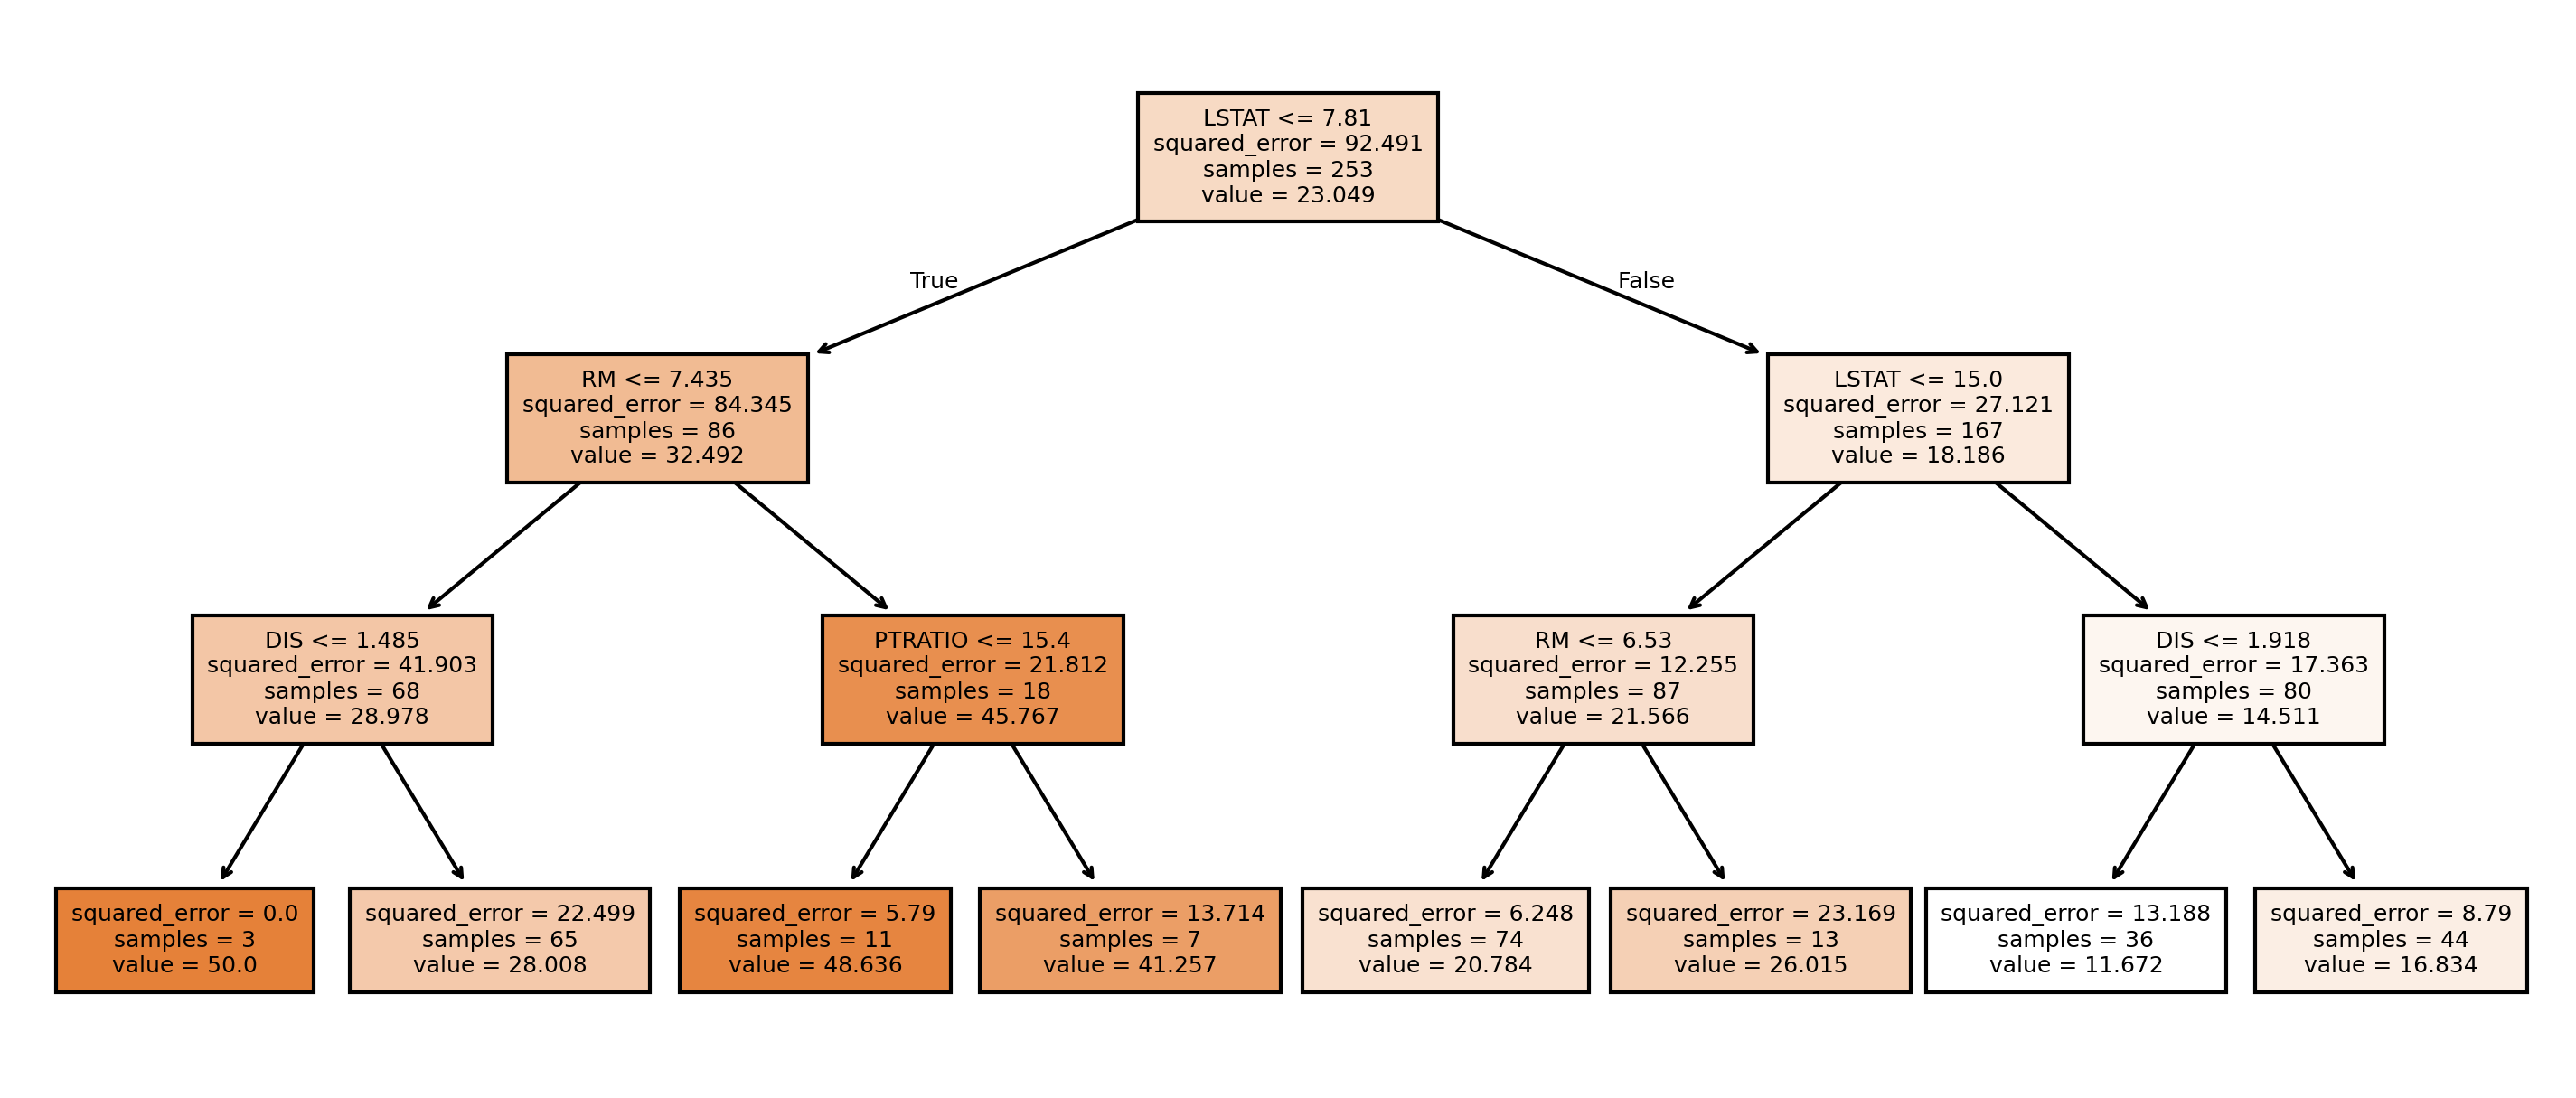

In [11]:
fig = plt.figure(figsize=(12,5), dpi=300)
ax = tree.plot_tree(regr,
                   feature_names=list(X.columns),
                   filled=True,
                   fontsize=6)
plt.show()

**예측 성과**

분류 트리가 아니고 회귀 트리이기 때문에 예측의 성과를 혼동행렬이 아니라 MSE(평균제곱오차) 같은 것으로 측정해야 한다. MSE는 모든 관측에 대해 예측값과 실제값의 차이, 즉 오차(error)를 제곱해서 평균한 것이다. 직접 계산할 수도 있지만, `sklearn.metrics` 모듈의 `mean_squared_error()` 함수를 사용하면 쉽게 구할 수 있다. 아래 결과를 보면, 훈련 MSE는 12.83이고 테스트 MSE는 26.02로서 후자가 훨씬 큰 것을 알 수 있다.

한편, 예측 성과를 시각적으로 가늠해보기 위해 예측값과 실제값을 산점도로 그려 보았다. 이 산점도에서 어떤 관측의 예측값이 실제값과 일치하면, 해당 관측은 45도 점선 상에 위치할 것이다. 즉 산점도에 나와 있는 파란색 동그라미 포인트들이 45도 점선 상에 몰려 있을수록 예측 성과가 우수하다. 

아래 결과를 보면, 가로축에 있는 예측값(`pred`)의 범위가 0에서 50까지인데, 예측값의 종류는 겨우 7-8개밖에 없다. 그 이유는 위 트리에서 끝마디가 8개뿐이기 때문이다. 모든 테스트 관측은 이 8개 영역 중 하나에 속하는 것으로 분류되기 때문에 예측값 역시 최대 8개밖에 나올 수 없다. 더욱이 테스트 세트의 경우, 예측값이 50인 영역에는 테스트 관측이 하나도 속하지 않아 예측값이 7개 종류밖에 없다.

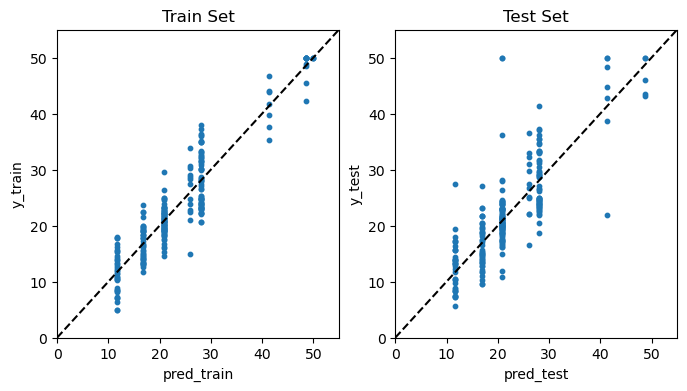

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.scatter(pred_train, y_train, s=10)
ax1.set_xlabel('pred_train')
ax1.set_ylabel('y_train')
ax1.set_title('Train Set', fontsize=12)

ax2.scatter(pred_test, y_test, s=10)
ax2.set_xlabel('pred_test')
ax2.set_ylabel('y_test')
ax2.set_title('Test Set', fontsize=12)

for ax in fig.axes:
    ax.plot([0, 55], [0, 55], 'k--')
    ax.set_xlim([0, 55])
    ax.set_ylim([0, 55])
plt.show()

In [13]:
print('MSE(훈련 세트):', round(mean_squared_error(y_train, pred_train), 2))
print('MSE(테스트 세트):', round(mean_squared_error(y_test, pred_test), 2))

MSE(훈련 세트): 12.83
MSE(테스트 세트): 26.02


### 배깅 모형

사이킷런의 `RandomForestRegressor()` 함수를 사용해 배깅 모형을 설정한다. 우선 트리를 만들 때 사용하는 예측변수의 개수가 훈련 세트의 예측변수 개수와 동일한 것이 배깅 모델이기 때문에 `max_features=12`로 설정했다. 그리고 붓스트랩의 횟수, 즉 트리의 개수(`n_estimators`)를 정해야 하는데, 여기에서는 500개로 정했다.(기본값은 100개임.) 이와 함께, 실행할 때마다 결과가 달라지는 것을 막기 위해 `random_state`를 설정했다. 

이렇게 설정한 모델을 훈련 세트(`X_train`, `y_train`)에 피팅하고, 그 결과를 훈련 세트(`X_train`) 및 테스트 세트(`X_test`)에 적용하여 각각에 대해 주택가격 예측값(`pred_train` 및 `pred_test`)을 구했다.

In [14]:
regr1 = RandomForestRegressor(max_features=12, n_estimators=500, random_state=1)
regr1.fit(X_train, y_train)

pred_train = regr1.predict(X_train)
pred_test = regr1.predict(X_test)

**예측 성과**

앞에서와 마찬가지로 훈련 세트와 테스트 세트 각각에 대해 예측값과 실제값을 산점도를 통해 비교하고, 또한 훈련 및 테스트 MSE를 계산했다. 산점도를 보면, 앞의 단일 트리 모델에서는 예측값(`pred`) 종류가 7개밖에 없었는데 반해, 아래 배깅 모델의 경우에는 예측값이 아주 다양하다. 그 이유는 각 관측에 대해 서로 다른 500개 트리에서 구한 예측값을 평균하여 최종 예측값을 구하기 때문이다. 

대략적으로 보기에 아래 배깅의 산점도가 앞의 단일 트리 모형에 비해 파란색 동그라미 포인트들이 45도 점선 상에 훨씬 더 몰려 있어 예측 성과가 더 우수한 것으로 판단된다. 특히 훈련 세트에서의 예측 성과가 눈에 띄게 좋아진 것을 알 수 있다. 실제로 MSE를 보더라도 훈련 세트에서는 배깅이 1.36으로서 단일 트리 모델(12.83)에 비해 오차가 거의 1/10 수준으로 대폭 낮아졌고, 테스트 세트에서는 배깅이 16.08로서 단일 트리 모델(26.02)의 62% 수준으로 낮아졌다.

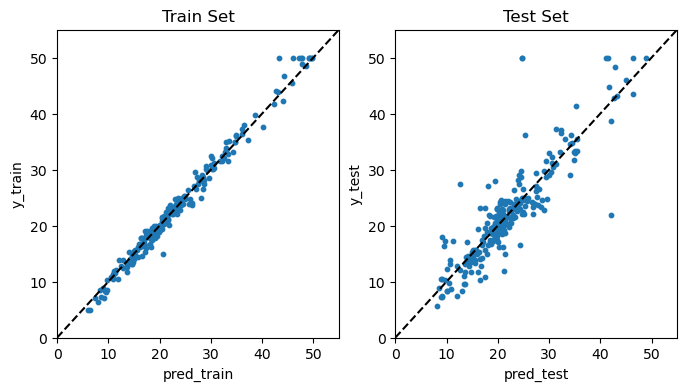

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.scatter(pred_train, y_train, s=10)
ax1.set_xlabel('pred_train')
ax1.set_ylabel('y_train')
ax1.set_title('Train Set', fontsize=12)

ax2.scatter(pred_test, y_test, s=10)
ax2.set_xlabel('pred_test')
ax2.set_ylabel('y_test')
ax2.set_title('Test Set', fontsize=12)

for ax in fig.axes:
    ax.plot([0, 55], [0, 55], 'k--')
    ax.set_xlim([0, 55])
    ax.set_ylim([0, 55])
plt.show()

In [16]:
print('MSE(훈련 세트):', round(mean_squared_error(y_train, pred_train), 2))
print('MSE(테스트 세트):', round(mean_squared_error(y_test, pred_test), 2))

MSE(훈련 세트): 1.36
MSE(테스트 세트): 16.08


**변수 중요도 측정**

피팅된 모델(`regr1`)에 `RandomForestRegressor()`의 속성(attribute)인 `feature_importances_`를 적용하여 MDI(Mean Decrease in Impurity)에 기초한 변수 중요도를 막대그래프로 그렸다.

아래 결과를 보면, `LSTAT`(인구 중 하위 계층 비율)이 주택가격을 결정하는 가장 중요한 변수이고, 그 다음이 `RM`(주택당 평균 방 수)이며, 나머지 다른 변수들의 중요도는 이 두 변수에 비해 훨씬 낮은 것으로 나타났다. 

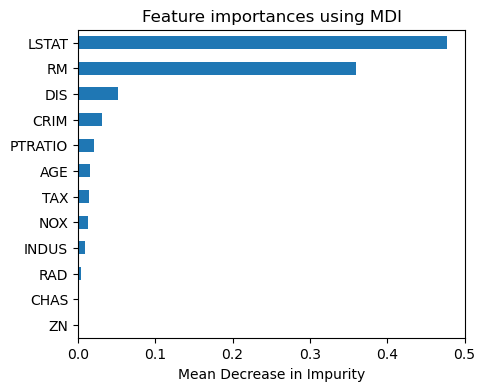

In [17]:
Importance = pd.DataFrame({'Importance':regr1.feature_importances_},index=X.columns)
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', figsize=(5,4))
plt.title('Feature importances using MDI')
plt.xlabel('Mean Decrease in Impurity')
plt.gca().legend_ = None
plt.show()

### 랜덤 포레스트 모형

랜덤 포레스트는 `RandomForestRegressor()` 함수로 모형을 설정한다. 우선 트리를 만들 때 사용하는 예측변수의 개수를 전체 예측변수의 절반인 6개로 정했다(`max_features=6`). 이에 따라 각 마디에서 이항 분할로 트리를 만들 때, 총 12개 예측변수에서 무작위로 6개를 선택하게 된다. 트리의 개수(`n_estimators`)는 앞의 배깅 모델과 마찬가지로 500개로 정했다.(기본값은 100개임.) 이와 함께, 실행할 때마다 결과가 달라지는 것을 막기 위해 `random_state`를 설정했다. 

이렇게 설정한 모델을 훈련 세트(`X_train`, `y_train`)에 피팅하고, 그 결과를 훈련 세트(`X_train`) 및 테스트 세트(`X_test`)에 적용하여 각각에 대해 주택가격 예측값(`pred_train` 및 `pred_test`)을 구했다.

In [18]:
regr2 = RandomForestRegressor(max_features=6, n_estimators=500, random_state=1)
regr2.fit(X_train, y_train)

pred_train = regr2.predict(X_train)
pred_test = regr2.predict(X_test)

**예측 성과**

앞에서와 마찬가지로 훈련 세트와 테스트 세트 각각에 대해 예측값과 실제값을 산점도를 통해 비교하고, 또한 훈련 및 테스트 MSE를 계산했다. 

결과를 보면, 전체적으로 배깅과 랜덤 포레스트의 예측 성과는 별 차이가 없어 보인다. 훈련 MSE의 경우에는 랜덤 포레스트가 1.19로서 배깅(1.36)에 비해 어느 정도 개선됐지만, 테스트 MSE의 경우에는 랜덤 포레스트(16.01)와 배깅(16.08) 간에 거의 차이가 없다. 물론 이런 결과는 `max_features`나 `n_estimators` 파라미터를 어떻게 설정하느냐에 따라 약간씩 달라질 것이다.

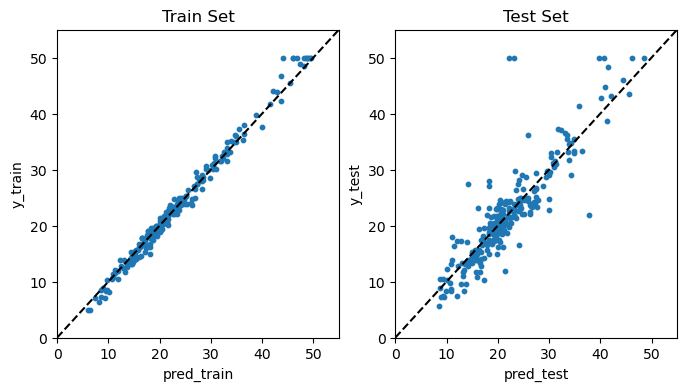

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.scatter(pred_train, y_train, s=10)
ax1.set_xlabel('pred_train')
ax1.set_ylabel('y_train')
ax1.set_title('Train Set', fontsize=12)

ax2.scatter(pred_test, y_test, s=10)
ax2.set_xlabel('pred_test')
ax2.set_ylabel('y_test')
ax2.set_title('Test Set', fontsize=12)

for ax in fig.axes:
    ax.plot([0, 55], [0, 55], 'k--')
    ax.set_xlim([0, 55])
    ax.set_ylim([0, 55])
plt.show()

In [20]:
print('MSE(훈련 세트):', round(mean_squared_error(y_train, pred_train), 2))
print('MSE(테스트 세트):', round(mean_squared_error(y_test, pred_test), 2))

MSE(훈련 세트): 1.19
MSE(테스트 세트): 16.01


**변수 중요도 측정**

여기에서도 피팅된 모델에 `feature_importances_` 속성을 적용하여 MDI에 기초한 변수 중요도를 막대그래프로 그렸다. 아래 결과를 보면, 배깅 모형과 아주 유사한데, `LSTAT`가 주택가격을 결정하는 가장 중요한 변수이고, 그 다음이 `RM`이며, 나머지 다른 변수들의 중요도는 이들에 비해 훨씬 낮다. 

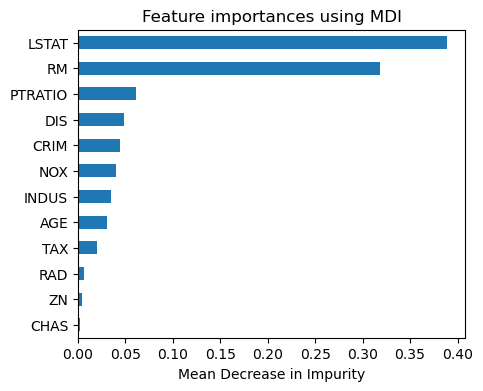

In [21]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_},index=X.columns)
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', figsize=(5,4))
plt.title('Feature importances using MDI')
plt.xlabel('Mean Decrease in Impurity')
plt.gca().legend_ = None
plt.show()

### 적응적 부스팅 모형

적응적 부스팅 기법인 AdaBoost는 `AdaBoostRegressor()` 함수로 모형을 설정한다. 우선 회귀 트리를 만들 때 트리의 최대 깊이를 3으로 정했다(`base_estimator=DecisionTreeRegressor(max_depth=3)`). 부스팅에 사용되는 트리의 개수(`n_estimators`)는 앞의 배깅 및 랜덤 포레스트보다 10배 많은 5,000개로 정했다.(기본값은 50개임.) 부스팅에서는 학습률(`learning_rate`)을 정해야 하는데, 여기에서는 0.01로 했다. 이와 함께, 실행할 때마다 결과가 달라지는 것을 막기 위해 `random_state`를 설정했다. 

이렇게 설정한 모델을 훈련 세트(`X_train`, `y_train`)에 피팅하고, 그 결과를 훈련 세트(`X_train`) 및 테스트 세트(`X_test`)에 적용하여 각각에 대해 주택가격 예측값(`pred_train` 및 `pred_test`)을 구했다.

In [22]:
regr3 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                          n_estimators=5000, 
                          learning_rate=0.01, 
                          random_state=1)
regr3.fit(X_train, y_train)

pred_train = regr3.predict(X_train)
pred_test = regr3.predict(X_test)

**예측 성과**

앞에서와 마찬가지로 훈련 세트와 테스트 세트 각각에 대해 예측값과 실제값을 산점도를 통해 비교하고, 또한 훈련 및 테스트 MSE를 계산했다. 

결과를 보면, AdaBoost의 경우에는 전체적으로 배깅이나 랜덤 포레스트에 비해 예측 성과가 오히려 더 나빠진 것으로 나타났다. 훈련 MSE의 경우에는 AdaBoost가 5.29로서 랜덤 포레스트(1.19)에 비해 오차가 대폭 커졌고, 테스트 MSE 역시 AdaBoost가 19.84로서 랜덤 포레스트(16.01)보다 오히려 커졌다. 

부스팅의 경우에는 `max_depth`나 `n_estimators` 파라미터를 어떻게 설정하느냐에 따라 결과가 상당히 영향을 받는다. 따라서 이 결과를 가지고 AdaBoost가 랜덤 포레스트나 배깅에 비해 예측 성과가 떨어진다고 단언할 수는 없다.

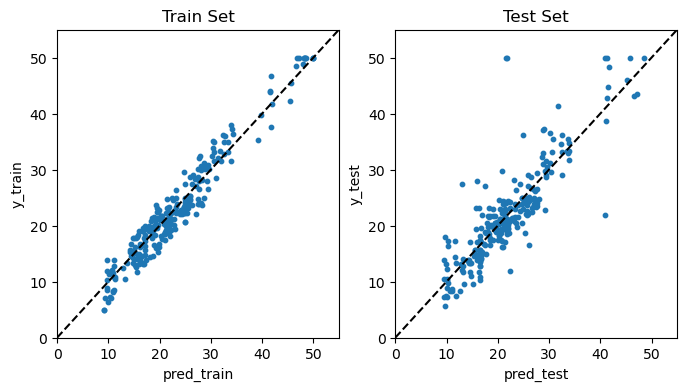

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.scatter(pred_train, y_train, s=10)
ax1.set_xlabel('pred_train')
ax1.set_ylabel('y_train')
ax1.set_title('Train Set', fontsize=12)

ax2.scatter(pred_test, y_test, s=10)
ax2.set_xlabel('pred_test')
ax2.set_ylabel('y_test')
ax2.set_title('Test Set', fontsize=12)

for ax in fig.axes:
    ax.plot([0, 55], [0, 55], 'k--')
    ax.set_xlim([0, 55])
    ax.set_ylim([0, 55])
plt.show()

In [24]:
print('MSE(훈련 세트):', round(mean_squared_error(y_train, pred_train), 2))
print('MSE(테스트 세트):', round(mean_squared_error(y_test, pred_test), 2))

MSE(훈련 세트): 5.29
MSE(테스트 세트): 19.84


**변수 중요도 측정**

여기에서도 피팅된 모델에 `feature_importances_` 속성을 적용하여 MDI에 기초한 변수 중요도를 막대그래프로 그렸다. 아래 결과를 보면, 앞의 배깅 및 랜덤 포레스트와 유사하게 `LSTAT`가 주택가격을 결정하는 가장 중요한 변수이고, 그 다음이 `RM`이며, 나머지 다른 변수들의 중요도는 이들에 비해 훨씬 낮다. 

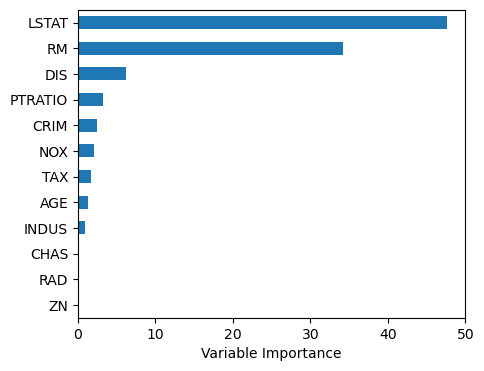

In [25]:
Importance = pd.DataFrame({'Importance':regr3.feature_importances_*100},index=X.columns)
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', figsize=(5,4))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()

### 경사도 부스팅 모형

경사도 부스팅은 `GradientBoostingRegressor()` 함수로 모형을 설정한다. 우선 회귀 트리를 만들 때 트리의 최대 깊이를 앞의 AdaBoost와 마찬가지로 3으로 정했다(`max_depth=3`). 부스팅에 사용되는 트리의 개수(`n_estimators`) 역시 앞의 AdaBoost와 마찬가지로 5,000개로 했으며, 학습률(`learning_rate`) 역시 0.01로 똑같이 했다. 이와 함께, 실행할 때마다 결과가 달라지는 것을 막기 위해 `random_state`를 설정했다. 

이렇게 설정한 모델을 훈련 세트(`X_train`, `y_train`)에 피팅하고, 그 결과를 훈련 세트(`X_train`) 및 테스트 세트(`X_test`)에 적용하여 각각에 대해 주택가격 예측값(`pred_train` 및 `pred_test`)을 구했다.

In [26]:
regr4 = GradientBoostingRegressor(max_depth=3, 
                                  n_estimators=5000, 
                                  learning_rate=0.01, 
                                  random_state=1)
regr4.fit(X_train, y_train)

pred_train = regr4.predict(X_train)
pred_test = regr4.predict(X_test)

**예측 성과**

앞에서와 마찬가지로 훈련 세트와 테스트 세트 각각에 대해 예측값과 실제값을 산점도를 통해 비교하고, 또한 훈련 및 테스트 MSE를 계산했다. 

산점도를 보면, 훈련 세트의 경우 예측 성과가 매우 뛰어난 것을 한눈에 알 수 있다. 거의 모든 파란색 동그라미 포인트들이 45도 선상에 있어 적어도 훈련 세트에 대해서는 예측력이 거의 완벽해 보인다. 이는 MSE 상으로도 나타나는데, 훈련 MSE의 경우에는 경사도 부스팅이 0.02로서 거의 0에 가깝다. 훈련 MSE 크기가 AdaBoost(5.29)와 랜덤 포레스트(1.19)에 비해 대폭 줄었음은 물론이다. 테스트 MSE 역시 경사도 부스팅이 15.31로서 AdaBoost(19.84)와 랜덤 포레스트(16.01)에 비해 개선되었다. 

물론 이런 결과는 각 모형의 여러 파라미터를 어떻게 설정하느냐에 따라 달라지지만, 개략적으로 평가했을 때 `Boston` 주택가격 데이터세트에 대해서는 여러 앙상블 모델 중 경사도 부스팅 모형의 예측 성과가 가장 우수한 것으로 나타났다. 

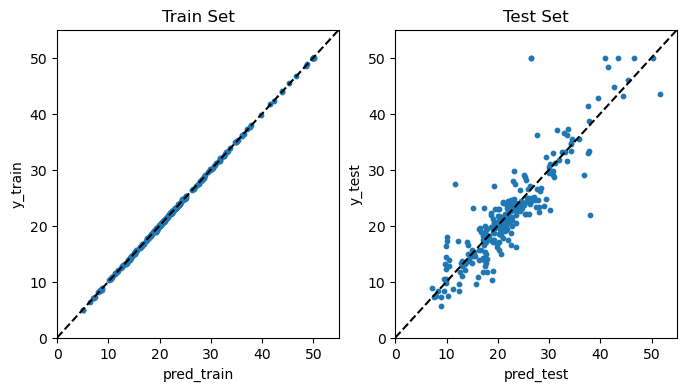

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.scatter(pred_train, y_train, s=10)
ax1.set_xlabel('pred_train')
ax1.set_ylabel('y_train')
ax1.set_title('Train Set', fontsize=12)

ax2.scatter(pred_test, y_test, s=10)
ax2.set_xlabel('pred_test')
ax2.set_ylabel('y_test')
ax2.set_title('Test Set', fontsize=12)

for ax in fig.axes:
    ax.plot([0, 55], [0, 55], 'k--')
    ax.set_xlim([0, 55])
    ax.set_ylim([0, 55])
plt.show()

In [28]:
print('MSE(훈련 세트):', round(mean_squared_error(y_train, pred_train), 2))
print('MSE(테스트 세트):', round(mean_squared_error(y_test, pred_test), 2))

MSE(훈련 세트): 0.02
MSE(테스트 세트): 15.31


**변수 중요도 측정**

여기에서도 피팅된 모델에 `feature_importances_` 속성을 적용하여 MDI에 기초한 변수 중요도를 막대그래프로 그렸다. 아래 결과를 보면, 앞의 다른 앙상블 모델과 아주 유사한데, `LSTAT`가 주택가격을 결정하는 가장 중요한 변수이고, 그 다음이 `RM`이며, 나머지 다른 변수들의 중요도는 이들에 비해 훨씬 낮다. 가장 중요한 변수 처음 다섯 개가 바로 앞의 AdaBoost 모델과 순서까지 동일한 점도 눈에 띈다. 

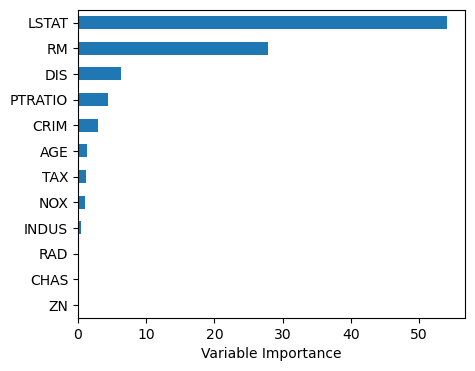

In [29]:
Importance = pd.DataFrame({'Importance':regr4.feature_importances_*100},index=X.columns)
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', figsize=(5,4))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()